# Etude de la variable aefa

In [184]:
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy import logical_not as not_, minimum as min_, maximum as max_, logical_and as and_, logical_or as or_, round as round_


import openfisca_france
from openfisca_france.model.base import *

from openfisca_core.reforms import Reform



In [185]:
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()  

### Le cas d'une personne seule sans enfant

In [186]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    ).new_simulation(debug = True)


In [187]:
individu_sans_enfant_aefa = simulation.calculate_add('aefa')/12
individu_sans_enfant_aefa

array([ 12.70416641,  12.70416641,  12.70416641,  12.70416641,
        12.70416641,  12.70416641,  12.70416641,  12.70416641,
        12.70416641,  12.70416641,  12.70416641,  12.70416641,
        12.70416641,  12.70416641,  12.70416641,  12.70416641,
        12.70416641,  12.70416641,  12.70416641,  12.70416641], dtype=float32)

In [188]:
individu_sans_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_sans_enfant_salaire_de_base

array([    0.        ,   219.29823303,   438.59646606,   657.89471436,
         877.19293213,  1096.49121094,  1315.78942871,  1535.08776855,
        1754.38586426,  1973.6842041 ,  2192.98242188,  2412.28076172,
        2631.57885742,  2850.87719727,  3070.17553711,  3289.47363281,
        3508.77172852,  3728.0703125 ,  3947.3684082 ,  4166.66650391], dtype=float32)

### Le cas d'une personne seule avec 1 enfant

In [189]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
     ],
).new_simulation(debug = True)

In [190]:
individu_1_enfant_aefa = simulation.calculate_add('aefa')/12
individu_1_enfant_aefa

array([ 16.5154171,  16.5154171,  16.5154171,  16.5154171,  16.5154171,
        16.5154171,  16.5154171,  16.5154171,  16.5154171,  16.5154171,
        16.5154171,  16.5154171,  16.5154171,  16.5154171,  16.5154171,
        16.5154171,  16.5154171,  16.5154171,  16.5154171,  16.5154171], dtype=float32)

In [191]:
individu_1_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_1_enfant_salaire_de_base

array([    0.        ,     0.        ,   219.29823303,     0.        ,
         438.59646606,     0.        ,   657.89471436,     0.        ,
         877.19293213,     0.        ,  1096.49121094,     0.        ,
        1315.78942871,     0.        ,  1535.08776855,     0.        ,
        1754.38586426,     0.        ,  1973.6842041 ,     0.        ,
        2192.98242188,     0.        ,  2412.28076172,     0.        ,
        2631.57885742,     0.        ,  2850.87719727,     0.        ,
        3070.17553711,     0.        ,  3289.47363281,     0.        ,
        3508.77172852,     0.        ,  3728.0703125 ,     0.        ,
        3947.3684082 ,     0.        ,  4166.66650391,     0.        ], dtype=float32)

In [192]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
i_1_enfant_salaire_de_base = []
i = 0
while (i < len(individu_1_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = individu_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_1_enfant_salaire_de_base[i]
    somme = valeur_1 + valeur_2
    i_1_enfant_salaire_de_base.append(somme)
    i = i + 1
    
i_1_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'une personne seule avec 2 enfants

In [193]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        dict(date_naissance = date(2011, 1, 1)),
     ],
).new_simulation(debug = True)

In [194]:
individu_2_enfants_aefa = simulation.calculate_add('aefa')/12
individu_2_enfants_aefa

array([ 20.32666588,  20.32666588,  20.32666588,  20.32666588,
        20.32666588,  20.32666588,  20.32666588,  20.32666588,
        20.32666588,  20.32666588,  20.32666588,  20.32666588,
        20.32666588,  20.32666588,  20.32666588,  20.32666588,
        20.32666588,  20.32666588,  20.32666588,  20.32666588], dtype=float32)

In [195]:
individu_2_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_2_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,   219.29823303,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,   657.89471436,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,  1096.49121094,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,  1535.08776855,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,  1973.6842041 ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,  2412.28076172,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,  2850.87719727,
           0.        ,     0.        ,  3070.17553711,     0.        ,
           0.        ,  3289.47363281,     0.        ,     0.        ,
        3508.77172852,     0.        ,     0.        ,  3728.0703125 ,
           0.        ,     0.        ,  3947.3684082 ,     0.        ,
      

In [196]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
i_2_enfants_salaire_de_base = []
i = 0
while (i < len(individu_2_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = individu_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = individu_2_enfants_salaire_de_base[i]   
    somme = valeur_1 + valeur_2 + valeur_3
    i_2_enfants_salaire_de_base.append(somme)
    i = i + 1
    
i_2_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'une personne seule avec 3 enfants

In [197]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    enfants = [
        dict(date_naissance = date(2008, 1, 1)),
        dict(date_naissance = date(2004, 1, 1)),
        dict(date_naissance = date(2000, 1, 1)),
     ],
).new_simulation(debug = True)

In [198]:
individu_3_enfants_aefa = simulation.calculate_add('aefa')/12
individu_3_enfants_aefa

array([ 39.3829155,  39.3829155,  39.3829155,  39.3829155,  39.3829155,
        39.3829155,  39.3829155,  39.3829155,  39.3829155,  39.3829155,
        39.3829155,  39.3829155,  39.3829155,  39.3829155,  39.3829155,
        39.3829155,  39.3829155,  39.3829155,  39.3829155,  39.3829155], dtype=float32)

In [199]:
individu_3_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_3_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
         219.29823303,     0.        ,     0.        ,     0.        ,
         438.59646606,     0.        ,     0.        ,     0.        ,
         657.89471436,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
        1096.49121094,     0.        ,     0.        ,     0.        ,
        1315.78942871,     0.        ,     0.        ,     0.        ,
        1535.08776855,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
        1973.6842041 ,     0.        ,     0.        ,     0.        ,
        2192.98242188,     0.        ,     0.        ,     0.        ,
        2412.28076172,     0.        ,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,     0.        ,
        2850.87719727,     0.        ,     0.        ,     0.        ,
      

In [200]:
# Cette manipulation est nécessaire pour égaliser la longueur des 2 tableaux (aefa et salaire de base)
i_3_enfants_salaire_de_base = []
i = 0
while (i < len(individu_3_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = individu_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = individu_3_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = individu_3_enfants_salaire_de_base[i] 
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4
    i_3_enfants_salaire_de_base.append(somme)
    i = i + 1
    
i_3_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple sans enfant

In [201]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    parent2 = dict(
        ),    
).new_simulation(debug = True)

In [202]:
couple_sans_enfant_aefa = simulation.calculate_add('aefa')/12
couple_sans_enfant_aefa

array([ 19.05624962,  19.05624962,  19.05624962,  19.05624962,
        19.05624962,  19.05624962,  19.05624962,  19.05624962,
        19.05624962,  19.05624962,  19.05624962,  19.05624962,
        19.05624962,  19.05624962,  19.05624962,  19.05624962,
        19.05624962,  19.05624962,  19.05624962,  19.05624962], dtype=float32)

In [203]:
couple_sans_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_sans_enfant_salaire_de_base

array([    0.        ,     0.        ,   219.29823303,     0.        ,
         438.59646606,     0.        ,   657.89471436,     0.        ,
         877.19293213,     0.        ,  1096.49121094,     0.        ,
        1315.78942871,     0.        ,  1535.08776855,     0.        ,
        1754.38586426,     0.        ,  1973.6842041 ,     0.        ,
        2192.98242188,     0.        ,  2412.28076172,     0.        ,
        2631.57885742,     0.        ,  2850.87719727,     0.        ,
        3070.17553711,     0.        ,  3289.47363281,     0.        ,
        3508.77172852,     0.        ,  3728.0703125 ,     0.        ,
        3947.3684082 ,     0.        ,  4166.66650391,     0.        ], dtype=float32)

In [204]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
c_sans_enfant_salaire_de_base = []
i = 0
while (i < len(couple_sans_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = couple_sans_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_sans_enfant_salaire_de_base[i]
    somme = valeur_1 + valeur_2
    c_sans_enfant_salaire_de_base.append(somme)
    i = i + 1
    
c_sans_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 1 enfant

In [205]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        ],
).new_simulation(debug = True)

In [206]:
couple_1_enfant_aefa = simulation.calculate_add('aefa')/12
couple_1_enfant_aefa

array([ 22.86750031,  22.86750031,  22.86750031,  22.86750031,
        22.86750031,  22.86750031,  22.86750031,  22.86750031,
        22.86750031,  22.86750031,  22.86750031,  22.86750031,
        22.86750031,  22.86750031,  22.86750031,  22.86750031,
        22.86750031,  22.86750031,  22.86750031,  22.86750031], dtype=float32)

In [207]:
couple_1_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_1_enfant_salaire_de_base

array([    0.        ,     0.        ,     0.        ,   219.29823303,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,   657.89471436,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,  1096.49121094,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,  1535.08776855,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,  1973.6842041 ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,  2412.28076172,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,  2850.87719727,
           0.        ,     0.        ,  3070.17553711,     0.        ,
           0.        ,  3289.47363281,     0.        ,     0.        ,
        3508.77172852,     0.        ,     0.        ,  3728.0703125 ,
           0.        ,     0.        ,  3947.3684082 ,     0.        ,
      

In [208]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
c_1_enfant_salaire_de_base = []
i = 0
while (i < len(couple_1_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = couple_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_1_enfant_salaire_de_base[i]   
    somme = valeur_1 + valeur_2 + valeur_3
    c_1_enfant_salaire_de_base.append(somme)
    i = i + 1
    
c_1_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 2 enfants

In [209]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        dict(date_naissance = date(2011, 1, 1)),
        ],
).new_simulation(debug = True)    

In [210]:
couple_2_enfants_aefa = simulation.calculate_add('aefa')/12
couple_2_enfants_aefa

array([ 26.67874908,  26.67874908,  26.67874908,  26.67874908,
        26.67874908,  26.67874908,  26.67874908,  26.67874908,
        26.67874908,  26.67874908,  26.67874908,  26.67874908,
        26.67874908,  26.67874908,  26.67874908,  26.67874908,
        26.67874908,  26.67874908,  26.67874908,  26.67874908], dtype=float32)

In [211]:
couple_2_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_2_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
         219.29823303,     0.        ,     0.        ,     0.        ,
         438.59646606,     0.        ,     0.        ,     0.        ,
         657.89471436,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
        1096.49121094,     0.        ,     0.        ,     0.        ,
        1315.78942871,     0.        ,     0.        ,     0.        ,
        1535.08776855,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
        1973.6842041 ,     0.        ,     0.        ,     0.        ,
        2192.98242188,     0.        ,     0.        ,     0.        ,
        2412.28076172,     0.        ,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,     0.        ,
        2850.87719727,     0.        ,     0.        ,     0.        ,
      

In [212]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
c_2_enfants_salaire_de_base = []
i = 0
while (i < len(couple_2_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = couple_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_2_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = couple_2_enfants_salaire_de_base[i] 
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4
    c_2_enfants_salaire_de_base.append(somme)
    i = i + 1
    
c_2_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 3 enfants

In [213]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2015,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2008, 1, 1)),
        dict(date_naissance = date(2004, 1, 1)),
        dict(date_naissance = date(2000, 1, 1)),
        ],
).new_simulation(debug = True)    

In [214]:
couple_3_enfants_aefa = simulation.calculate_add('aefa')/12
couple_3_enfants_aefa

array([ 45.73500061,  45.73500061,  45.73500061,  45.73500061,
        45.73500061,  45.73500061,  45.73500061,  45.73500061,
        45.73500061,  45.73500061,  45.73500061,  45.73500061,
        45.73500061,  45.73500061,  45.73500061,  45.73500061,
        45.73500061,  45.73500061,  45.73500061,  45.73500061], dtype=float32)

In [215]:
couple_3_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_3_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,   219.29823303,     0.        ,     0.        ,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,     0.        ,     0.        ,   657.89471436,
           0.        ,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
           0.        ,  1096.49121094,     0.        ,     0.        ,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,     0.        ,     0.        ,  1535.08776855,
           0.        ,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
           0.        ,  1973.6842041 ,     0.        ,     0.        ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,     0.        ,     0.        ,  2412.28076172,
      

In [216]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (aefa et salaire de base)
c_3_enfants_salaire_de_base = []
i = 0
while (i < len(couple_3_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = couple_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_3_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = couple_3_enfants_salaire_de_base[i] 
    i = i + 1
    valeur_5 = couple_3_enfants_salaire_de_base[i]    
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4 + valeur_5
    c_3_enfants_salaire_de_base.append(somme)
    i = i + 1
    
c_3_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

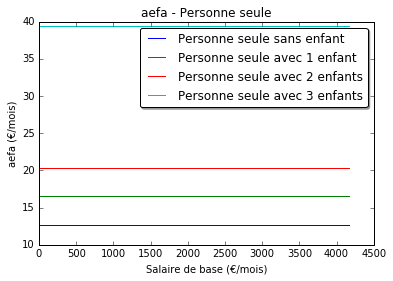

In [217]:
plt.plot(individu_sans_enfant_salaire_de_base, individu_sans_enfant_aefa, label="Personne seule sans enfant")
plt.plot(i_1_enfant_salaire_de_base, individu_1_enfant_aefa, label="Personne seule avec 1 enfant")
plt.plot(i_2_enfants_salaire_de_base, individu_2_enfants_aefa, label="Personne seule avec 2 enfants")
plt.plot(i_3_enfants_salaire_de_base, individu_3_enfants_aefa, label="Personne seule avec 3 enfants")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'aefa (€/mois)')
plt.title(u'aefa - Personne seule')
plt.legend(loc = 0, shadow=True, fancybox=True)

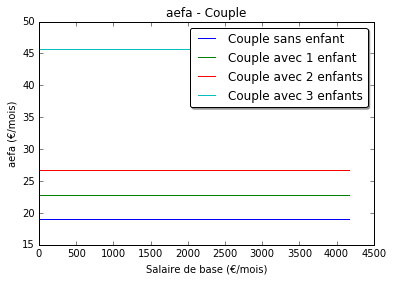

In [218]:
plt.plot(c_sans_enfant_salaire_de_base, couple_sans_enfant_aefa, label="Couple sans enfant")
plt.plot(c_1_enfant_salaire_de_base, couple_1_enfant_aefa, label="Couple avec 1 enfant")
plt.plot(c_2_enfants_salaire_de_base, couple_2_enfants_aefa, label="Couple avec 2 enfants")
plt.plot(c_3_enfants_salaire_de_base, couple_3_enfants_aefa, label="Couple avec 3 enfants")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'aefa (€/mois)')
plt.title(u'aefa - Couple')
plt.legend(loc = 0, shadow=True, fancybox=True)